In [3]:
# 以下は必要なライブラリのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3


'%.3f'

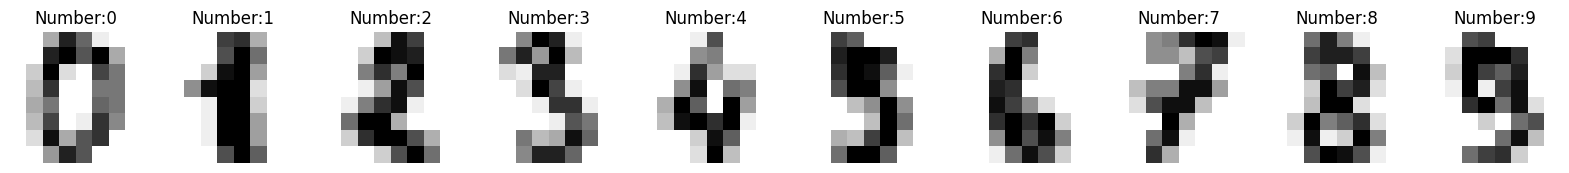

In [5]:
# 分析対象データ
from sklearn.datasets import load_digits

digits = load_digits()

# 画像の表示
plt.figure(figsize=(20,5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1,10,label+1)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Number:{0}'.format(label))


In [6]:
# データセットのキー一覧を表示
print(digits.keys())

# 画像データ（8x8画像が1797枚）
print(digits.images.shape)
print(digits.images[0])  # 1枚目の画像データ

# 特徴量データ（各画像を1次元配列にしたもの）
print(digits.data.shape)
print(digits.data[0])    # 1枚目の特徴量

# 正解ラベル
print(digits.target.shape)
print(digits.target[:10])  # 最初の10個のラベル

# データセットの説明
print(digits.DESCR)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797,)
[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:C

In [7]:
# データの要約
print("画像データの形状:", digits.images.shape)  # (1797, 8, 8)
print("特徴量データの形状:", digits.data.shape)  # (1797, 64)
print("ラベルの形状:", digits.target.shape)      # (1797,)

print(f"サンプル数（行数）: {digits.data.shape[0]}")
print(f"特徴量数（列数）: {digits.data.shape[1]}")

画像データの形状: (1797, 8, 8)
特徴量データの形状: (1797, 64)
ラベルの形状: (1797,)
サンプル数（行数）: 1797
特徴量数（列数）: 64


In [8]:
from sklearn.model_selection import train_test_split

# 特徴量データとラベルを取得
X = digits.data
y = digits.target

# 学習データとテストデータに分割（テストデータは全体の20%）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

print("学習データの形状:", X_train.shape, y_train.shape)
print("テストデータの形状:", X_test.shape, y_test.shape)

学習データの形状: (1437, 64) (1437,)
テストデータの形状: (360, 64) (360,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ロジスティック回帰モデルの作成と学習
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

# 予測
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

# 精度の表示
print('学習データの正解率:', accuracy_score(y_train, y_pred_train))
print('テストデータの正解率:', accuracy_score(y_test, y_pred_test))

# 詳細な分類レポート
print('\nテストデータの分類レポート:')
print(classification_report(y_test, y_pred_test))

# 混同行列
print('テストデータの混同行列:')
print(confusion_matrix(y_test, y_pred_test))

学習データの正解率: 1.0
テストデータの正解率: 0.9583333333333334

テストデータの分類レポート:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.85      0.97      0.91        36
           2       1.00      0.97      0.99        35
           3       0.97      1.00      0.99        37
           4       0.97      0.94      0.96        36
           5       0.97      0.95      0.96        37
           6       0.97      0.97      0.97        36
           7       0.97      0.97      0.97        36
           8       0.94      0.86      0.90        35
           9       0.95      0.97      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

テストデータの混同行列:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  1  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 34  0  0  0  1  0]
 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# k近傍法モデルの作成と学習（k=5）
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 予測
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# 精度の表示
print('【k近傍法】')
print('学習データの正解率:', accuracy_score(y_train, y_pred_train_knn))
print('テストデータの正解率:', accuracy_score(y_test, y_pred_test_knn))

# 詳細な分類レポート
print('\nテストデータの分類レポート:')
print(classification_report(y_test, y_pred_test_knn))

# 混同行列
print('テストデータの混同行列:')
print(confusion_matrix(y_test, y_pred_test_knn))

【k近傍法】
学習データの正解率: 0.9909533750869868
テストデータの正解率: 0.9777777777777777

テストデータの分類レポート:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       0.95      0.95      0.95        37
           4       1.00      0.94      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.94      0.94      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

テストデータの混同行列:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  1  0]
 [ 0  1  0  

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SVMモデルの作成と学習（RBFカーネル）
svm = SVC(kernel='rbf', gamma='scale', random_state=0)
svm.fit(X_train, y_train)

# 予測
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

# 精度の表示
print('【SVM】')
print('学習データの正解率:', accuracy_score(y_train, y_pred_train_svm))
print('テストデータの正解率:', accuracy_score(y_test, y_pred_test_svm))

# 詳細な分類レポート
print('\nテストデータの分類レポート:')
print(classification_report(y_test, y_pred_test_svm))

# 混同行列
print('テストデータの混同行列:')
print(confusion_matrix(y_test, y_pred_test_svm))

【SVM】
学習データの正解率: 0.9958246346555324
テストデータの正解率: 0.9833333333333333

テストデータの分類レポート:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      0.94      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.94      0.94      0.94        35
           9       1.00      0.97      0.99        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

テストデータの混同行列:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  0  0]
 [ 0  0  0  0

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 勾配ブースティングモデルの作成と学習
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

# 予測
y_pred_train_gbc = gbc.predict(X_train)
y_pred_test_gbc = gbc.predict(X_test)

# 精度の表示
print('【勾配ブースティング】')
print('学習データの正解率:', accuracy_score(y_train, y_pred_train_gbc))
print('テストデータの正解率:', accuracy_score(y_test, y_pred_test_gbc))

# 詳細な分類レポート
print('\nテストデータの分類レポート:')
print(classification_report(y_test, y_pred_test_gbc))

# 混同行列
print('テストデータの混同行列:')
print(confusion_matrix(y_test, y_pred_test_gbc))

【勾配ブースティング】
学習データの正解率: 1.0
テストデータの正解率: 0.9583333333333334

テストデータの分類レポート:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       0.92      0.92      0.92        37
           4       1.00      0.94      0.97        36
           5       0.97      0.95      0.96        37
           6       1.00      0.92      0.96        36
           7       0.97      1.00      0.99        36
           8       0.87      0.94      0.90        35
           9       0.92      0.94      0.93        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

テストデータの混同行列:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  2  0]
 [ 0  0  0  0 34  1  0